In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### In this Demo we will implement Seam Carving simplified version. 
Main Paper Reference: https://perso.crans.org/frenoy/matlab2012/seamcarving.pdf.

A video of seam carving can be seen in youtube: https://www.youtube.com/watch?v=6NcIJXTlugc

## TODO

Follow https://en.wikipedia.org/wiki/Seam_carving for details

In [4]:
def calc_energy_map(out_image):
    # calculate energy map: Find edges using Scharr operator for the red, blue and green channels
    # and return the sum of all channels as energy map.
    return energy_map

## TODO

Computing a seam consists of finding a path of minimum energy cost from one end of the image to another. This can be done via dynamic programming as described in https://en.wikipedia.org/wiki/Seam_carving.

In [5]:
def viterbi(energy_map, out_image):
    # Return seam-indices to be removed. Algorithm follow from https://en.wikipedia.org/wiki/Seam_carving
   

    return indices

In [4]:
def delete_seam(seam_idx, out_image):
    m, n = out_image.shape[: 2]
    output = np.zeros((m, n - 1, 3))
    for row in range(m):
        col = seam_idx[row]
        output[row, :, 0] = np.delete(out_image[row, :, 0], [col])
        output[row, :, 1] = np.delete(out_image[row, :, 1], [col])
        output[row, :, 2] = np.delete(out_image[row, :, 2], [col])
    out_image = np.copy(output)
    return out_image

In [5]:
def seams_removal(num_pixel, img):
    out_image = np.copy(img)
    for dummy in range(num_pixel):
        energy_map = calc_energy_map(out_image)
        seam_idx = viterbi(energy_map, out_image)
        out_image = delete_seam(seam_idx, out_image)
    return out_image

Change in Columns required =  120
Original image size:  125 250
Final Wanted Image Size:  125 130


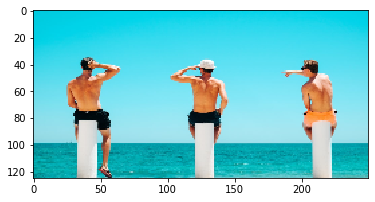

In [6]:
# Read an image and set how many columns of image need to be removed

filename_input = '3_person_beach.jpg'
in_image = cv2.imread(filename_input)
in_image = cv2.cvtColor(in_image, cv2.COLOR_BGR2RGB)
in_image = cv2.resize(in_image, (250, 125))
height_input, width_input = in_image.shape[: 2]

delta_col = 120
print("Change in Columns required = ", delta_col)
height_output = height_input
width_output = width_input - delta_col
print('Original image size: ', height_input, width_input)
print("Final Wanted Image Size: ", height_output, width_output)

plt.imshow(in_image)

In [7]:
# Run your seam carving algorithm 
out_image = seams_removal(delta_col, in_image)
out_image = out_image.astype(np.uint8)

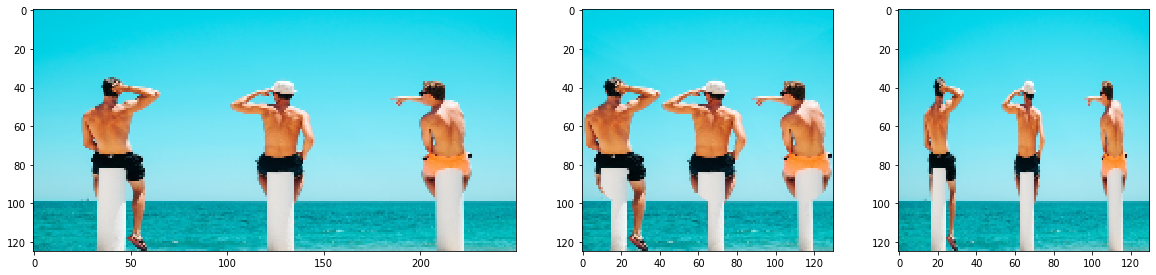

In [8]:
# Check how it works
fig, ax = plt.subplots(1, 3, figsize=(20, 20), gridspec_kw={'width_ratios':(width_input, width_output, width_output)})

# plt.subplot(1, 3, 1)
# plt.imshow(in_image)
ax[0].imshow(in_image)

# plt.subplot(1, 3, 2)
# plt.imshow(out_image)
ax[1].imshow(out_image)

# plt.subplot(1, 3, 3)
out_resized = cv2.resize(in_image, (width_output, height_output))
plt.imshow(out_resized)
ax[2].imshow(out_resized)

In [11]:
def viterbi_max(energy_map, out_image):
    # Return maximum enery seam instead of return minimum energy seam


In [12]:
def seams_removal_max(num_pixel, img):
    out_image = np.copy(img)
    for dummy in range(num_pixel):
        energy_map = calc_energy_map(out_image)
        seam_idx = viterbi_max(energy_map, out_image)

        temp_pic = out_image.copy()
        temp_pic[[i for i in range(energy_map.shape[0])], seam_idx] = [0, 0, 255]

        out_image = delete_seam(seam_idx, out_image)
    return out_image

Change in Columns required =  120
Original image size:  137 250
Final Wanted Image Size:  137 130


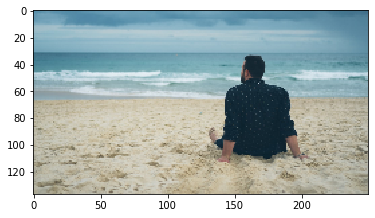

In [27]:
filename_input = 'max-beach.jpg'

# filename_input = '2beach.jpg'
in_image_1 = cv2.imread(filename_input)
in_image_1 = cv2.cvtColor(in_image_1, cv2.COLOR_BGR2RGB)
in_image_1 = cv2.resize(in_image_1, (250, 137))
height_input, width_input = in_image_1.shape[: 2]

delta_col = 120
print("Change in Columns required = ", delta_col)
height_output = height_input
width_output = width_input - delta_col
print('Original image size: ', height_input, width_input)
print("Final Wanted Image Size: ", height_output, width_output)

plt.imshow(in_image_1)

In [28]:
out_image1 = seams_removal_max(delta_col, in_image_1)
out_image1 = out_image1.astype(np.uint8)

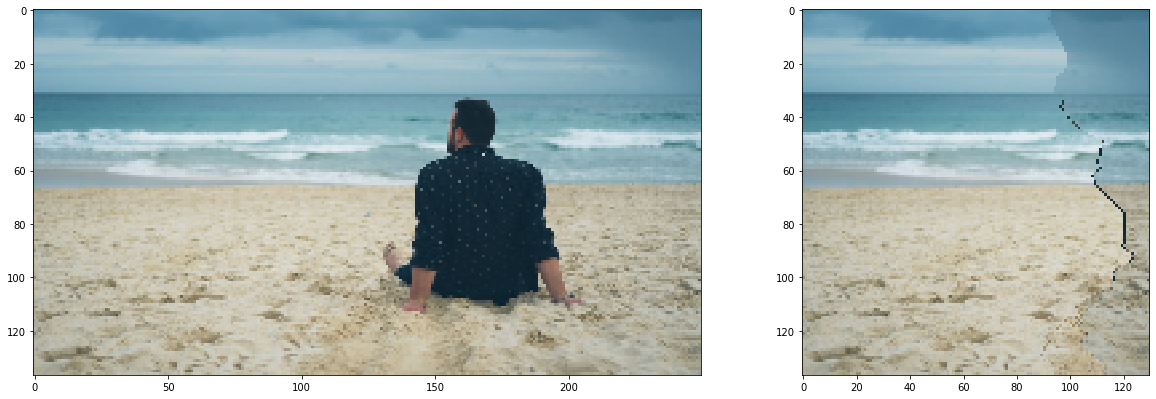

In [29]:
# fig, ax = plt.subplots(1, 3, figsize=(20, 20))
fig, ax = plt.subplots(1,2, figsize=(20, 20), gridspec_kw={'width_ratios':(width_input, width_output)})

# plt.subplot(1, 3, 1)
# plt.imshow(in_image)
ax[0].imshow(in_image_1)

# plt.subplot(1, 3, 2)
# plt.imshow(out_image)
ax[1].imshow(out_image1)